In [3]:
pip install keras

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------- ------------------------------- 10.2/46.2 kB ? eta -:--:--
     -------- ------------------------------- 10.2/46.2 kB ? eta -:--:--
     --------------------------------- ---- 41.0/46.2 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 229.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB 660.6 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.1 MB 653.6 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.1 MB 653.6 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.1 MB 653.6 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.1 MB 653.6 kB/s eta 0:00:02
   - --------------

In [9]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

In [5]:
NUM_CLASSES = 10

In [6]:
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()

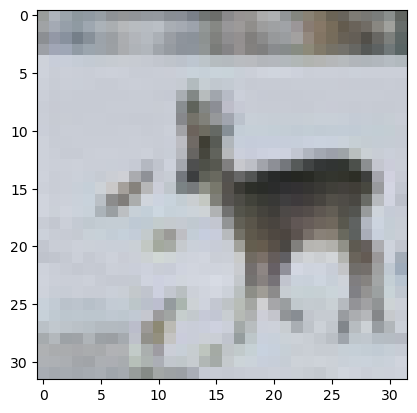

In [9]:
plt.imshow(x_train[20])

In [5]:
# covert float to int(pixel value standardize)(255 Predefined Value of INTs)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# covert to_categorical(HotOne Encoding)
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES) 

In [10]:
y_train.shape

(50000, 1)

In [32]:
x_train[54, 12, 13, 1] 

0.36862746

In [33]:
# ARCHITECTURE: 2Layers

In [35]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 2 ,
    kernel_size = (4,4) ,
    strides = 1 ,
    padding = 'same'
)(input_layer)

conv_layer_2 = Conv2D(
    filters = 20 ,
    kernel_size = (3,3) ,
    strides = 2 ,
    padding = 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

In [36]:
output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

In [37]:
model = Model(input_layer, output_layer)

In [38]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 2)           │              98 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 20)          │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5120)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          51,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,688 (201.91 KB)

 Trainable params: 51,688 (201.91 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# optimizer
opt = Adam(learning_rate=0.0005)
# compile the model
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])  

In [51]:
model.fit(x_train, y_train, batch_size=32, epochs=15, shuffle=True)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4245 - loss: 1.6831
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4268 - loss: 1.6769
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4279 - loss: 1.6670
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4304 - loss: 1.6586
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4262 - loss: 1.6717
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4329 - loss: 1.6596
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4264 - loss: 1.6619
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4305 - loss: 1.6531
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4372 - loss: 1.6480
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4348 - loss: 1.6533
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4369 - loss: 1.6501
Epoch 12/15
1563/1563 ━━━━━━━━

In [52]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3733 - loss: 1.7951


[1.7969303131103516, 0.373199999332428]

In [53]:
CLASSES = np.array(['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis= -1)]
actual_single = CLASSES[np.argmax(y_test, axis= -1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [54]:
preds

array([[0.01656894, 0.04505651, 0.12595102, ..., 0.00253194, 0.21308559,
        0.00153514],
       [0.02422454, 0.07691813, 0.00902507, ..., 0.00056718, 0.3194092 ,
        0.5596891 ],
       [0.34595606, 0.03087211, 0.03605463, ..., 0.00341685, 0.41612032,
        0.12868485],
       ...,
       [0.02120402, 0.00908798, 0.09311363, ..., 0.05943999, 0.02330131,
        0.00861993],
       [0.01842644, 0.10145357, 0.09491283, ..., 0.03415343, 0.02382004,
        0.07468974],
       [0.1650133 , 0.00780487, 0.27620932, ..., 0.14699131, 0.05039947,
        0.01457367]], dtype=float32)

In [55]:
preds_single

array(['Cat', 'Truck', 'Ship', ..., 'Cat', 'Deer', 'Bird'], dtype='<U10')

In [56]:
actual_single

array(['Cat', 'Ship', 'Ship', ..., 'Dog', 'Automobile', 'Horse'],
      dtype='<U10')

In [57]:
# TO VISUALIZE

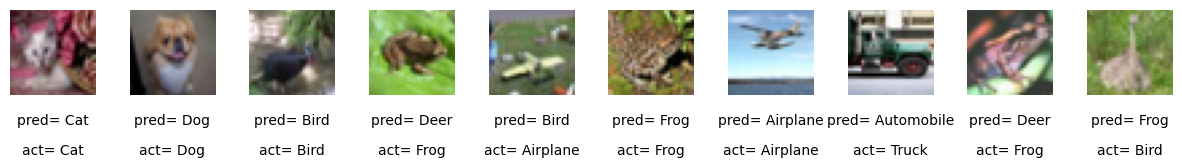

In [50]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1,n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred= '+str(preds_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act= '+str(actual_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
  ax.imshow(img)